# Importaciones

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder,MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, classification_report,roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNetCV, ElasticNet,LogisticRegression
from sklearn.decomposition import PCA

# Introduccion de Variables

Attribute information:

     1. Class: DIE, LIVE
     
     2. AGE: 10, 20, 30, 40, 50, 60, 70, 80
     
     3. SEX: male, female
     
     4. STEROID: no, yes
     
     5. ANTIVIRALS: no, yes
     
     6. FATIGUE: no, yes
     
     7. MALAISE: no, yes
     
     8. ANOREXIA: no, yes
     
     9. LIVER BIG: no, yes
     
    10. LIVER FIRM: no, yes
    
    11. SPLEEN PALPABLE: no, yes
    
    12. SPIDERS: no, yes
    
    13. ASCITES: no, yes
    
    14. VARICES: no, yes
    
    15. BILIRUBIN: 0.39, 0.80, 1.20, 2.00, 3.00, 4.00
        -- see the note below
        
    16. ALK PHOSPHATE: 33, 80, 120, 160, 200, 250
    
    17. SGOT: 13, 100, 200, 300, 400, 500, 
    
    18. ALBUMIN: 2.1, 3.0, 3.8, 4.5, 5.0, 6.0
    
    19. PROTIME: 10, 20, 30, 40, 50, 60, 70, 80, 90
    
    20. HISTOLOGY: no, yes

In [2]:
column_names = [
    'Class', 
    'AGE', 
    'SEX', 
    'STEROID', 
    'ANTIVIRALS', 
    'FATIGUE', 
    'MALAISE', 
    'ANOREXIA', 
    'LIVER BIG', 
    'LIVER FIRM', 
    'SPLEEN PALPABLE', 
    'SPIDERS', 
    'ASCITES', 
    'VARICES', 
    'BILIRUBIN', 
    'ALK PHOSPHATE', 
    'SGOT', 
    'ALBUMIN', 
    'PROTIME', 
    'HISTOLOGY'
]
df_hepatitis = pd.read_csv('Tema3.csv', header=None, names=column_names)

print(df_hepatitis.columns)
print(df_hepatitis.head(10))

Index(['Class', 'AGE', 'SEX', 'STEROID', 'ANTIVIRALS', 'FATIGUE', 'MALAISE',
       'ANOREXIA', 'LIVER BIG', 'LIVER FIRM', 'SPLEEN PALPABLE', 'SPIDERS',
       'ASCITES', 'VARICES', 'BILIRUBIN', 'ALK PHOSPHATE', 'SGOT', 'ALBUMIN',
       'PROTIME', 'HISTOLOGY'],
      dtype='object')
   Class   AGE  SEX STEROID  ANTIVIRALS FATIGUE MALAISE ANOREXIA LIVER BIG  \
0    2.0  30.0  2.1       1         2.2     2.3     2.4      2.5       1.1   
1    2.0  50.0  1.0       1         2.0       1       2        2         1   
2    NaN  78.0  1.0       2         2.0     NaN       2        2         2   
3    2.0  31.0  1.0       ?         1.0       2       2        2         2   
4    2.0  34.0  1.0       2         2.0       2       2        2         2   
5    2.0  34.0  1.0       2         2.0       2       2        2         2   
6    1.0  51.0  1.0       1         2.0       1       2        1         2   
7    2.0  23.0  1.0       2         2.0     NaN       2        2         2   
8    2.0  39.

In [3]:
print(df_hepatitis.isna().sum())  

Class              8
AGE                8
SEX                8
STEROID            8
ANTIVIRALS         7
FATIGUE            8
MALAISE            8
ANOREXIA           8
LIVER BIG          8
LIVER FIRM         8
SPLEEN PALPABLE    8
SPIDERS            8
ASCITES            8
VARICES            8
BILIRUBIN          7
ALK PHOSPHATE      7
SGOT               8
ALBUMIN            8
PROTIME            7
HISTOLOGY          8
dtype: int64


# Normalizacion de Variables

## Class

In [4]:
print(df_hepatitis['Class'].value_counts())

Class
2.000000     113
1.000000      30
15.321498      4
Name: count, dtype: int64


In [5]:
df_hepatitis['Class'] = df_hepatitis['Class'].replace(1,0) #0 DIE
df_hepatitis['Class'] = df_hepatitis['Class'].replace(2,1) #1 Survived
df_hepatitis['Class'].value_counts()

Class
1.000000     113
0.000000      30
15.321498      4
Name: count, dtype: int64

In [6]:
moda_Class = df_hepatitis['Class'].mode()

df_hepatitis['Class'] = df_hepatitis['Class'].apply(lambda x: x if x in [1, 0] else np.nan)
df_hepatitis['Class'] = df_hepatitis['Class'].fillna(moda_Class[0])

In [7]:
df_hepatitis['Class'].value_counts()

Class
1.0    125
0.0     30
Name: count, dtype: int64

## Age

In [8]:
print(df_hepatitis['AGE']) #Hay gente con mas de 300 años
print(df_hepatitis['AGE'].mean())
print(df_hepatitis['AGE'].dtype)

0       30.000000
1       50.000000
2       78.000000
3       31.000000
4       34.000000
          ...    
150     46.000000
151    391.698529
152     61.000000
153     53.000000
154     43.000000
Name: AGE, Length: 155, dtype: float64
50.590436164528505
float64


In [9]:
df_hepatitis['AGE'] = df_hepatitis['AGE'].apply(lambda x: x if x < 100 else np.nan)
mean_AGE = df_hepatitis['AGE'].mean()
df_hepatitis['AGE'] = df_hepatitis['AGE'].fillna(mean_AGE)

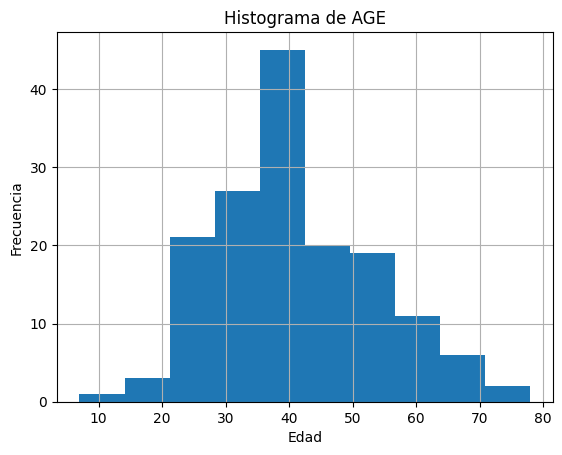

In [10]:
df_hepatitis['AGE'].hist(bins=10)
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Histograma de AGE')
plt.show()

In [11]:
scaler = StandardScaler()
df_hepatitis['AGE'] = scaler.fit_transform(df_hepatitis[['AGE']])

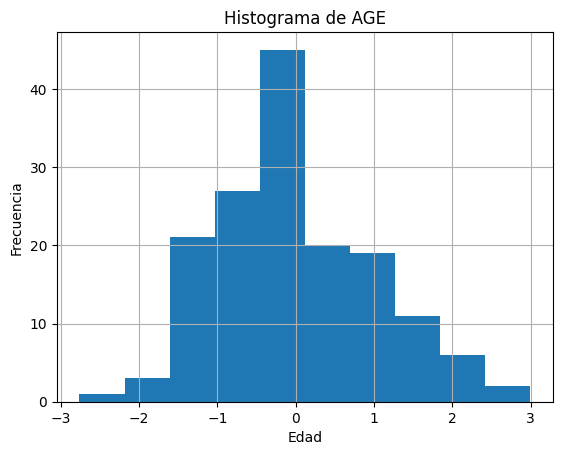

In [12]:
df_hepatitis['AGE'].hist(bins=10)
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Histograma de AGE')
plt.show()

## SEX

In [13]:
print(df_hepatitis['SEX'])

0      2.1
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
150    1.0
151    1.0
152    1.0
153    2.0
154    1.0
Name: SEX, Length: 155, dtype: float64


In [14]:
df_hepatitis['SEX'] = df_hepatitis['SEX'].replace(1,0) #0 Male
df_hepatitis['SEX'] = df_hepatitis['SEX'].replace(2,1) #1 Female

moda_SEX = df_hepatitis['SEX'].mode()

df_hepatitis['SEX'] = df_hepatitis['SEX'].apply(lambda x: x if x in [1, 0] else np.nan)
df_hepatitis['SEX'] = df_hepatitis['SEX'].fillna(moda_SEX[0])


df_hepatitis['SEX'].value_counts()

SEX
0.0    140
1.0     15
Name: count, dtype: int64

## STEROID

In [15]:
print(df_hepatitis['STEROID'].value_counts())

STEROID
2                73
1                70
inconsistente     3
?                 1
Name: count, dtype: int64


In [16]:
df_hepatitis['STEROID'] = pd.to_numeric(df_hepatitis['STEROID'], errors='coerce')

# Paso 3: Mantener solo valores 0, 1 y 2
df_hepatitis['STEROID'] = df_hepatitis['STEROID'].apply(lambda x: x if x in [0, 1, 2] else np.nan)

# Paso 4: Reemplazar 1 por 0 y 2 por 1
df_hepatitis['STEROID'] = df_hepatitis['STEROID'].replace({1: 0, 2: 1})

# Paso 5: Calcular la moda de la columna y rellenar los NaN con ella
moda_STEROID = df_hepatitis['STEROID'].mode()
moda_STEROID = moda_STEROID[0] if not moda_STEROID.empty else 0
df_hepatitis['STEROID'] = df_hepatitis['STEROID'].fillna(moda_STEROID)

# Paso 6: Convertir a tipo int
df_hepatitis['STEROID'] = df_hepatitis['STEROID'].astype(int)

# Verificar la distribución de valores
print(df_hepatitis['STEROID'].value_counts())

STEROID
1    85
0    70
Name: count, dtype: int64


## ANTIVIRALS

In [17]:
print(df_hepatitis['ANTIVIRALS'].value_counts())

ANTIVIRALS
2.000000     119
1.000000      24
13.526762      4
2.200000       1
Name: count, dtype: int64


In [18]:
df_hepatitis['ANTIVIRALS'] = pd.to_numeric(df_hepatitis['ANTIVIRALS'], errors='coerce')

# Paso 3: Mantener solo valores 0, 1 y 2
df_hepatitis['ANTIVIRALS'] = df_hepatitis['ANTIVIRALS'].apply(lambda x: x if x in [0, 1, 2] else np.nan)

# Paso 4: Reemplazar 1 por 0 y 2 por 1
df_hepatitis['ANTIVIRALS'] = df_hepatitis['ANTIVIRALS'].replace({1: 0, 2: 1})

# Paso 5: Calcular la moda de la columna y rellenar los NaN con ella
moda_ANTIVIRALS = df_hepatitis['ANTIVIRALS'].mode()
moda_ANTIVIRALS = moda_ANTIVIRALS[0] if not moda_ANTIVIRALS.empty else 0
df_hepatitis['ANTIVIRALS'] = df_hepatitis['ANTIVIRALS'].fillna(moda_ANTIVIRALS)

# Paso 6: Convertir a tipo int
df_hepatitis['ANTIVIRALS'] = df_hepatitis['ANTIVIRALS'].astype(int)

# Verificar la distribución de valores
print(df_hepatitis['ANTIVIRALS'].value_counts())

ANTIVIRALS
1    131
0     24
Name: count, dtype: int64


## FATIGUE

In [19]:
df_hepatitis['FATIGUE'].value_counts()

FATIGUE
1                96
2                46
inconsistente     3
2.3               1
?                 1
Name: count, dtype: int64

In [20]:
df_hepatitis['FATIGUE']

0      2.3
1        1
2      NaN
3        2
4        2
      ... 
150      1
151      1
152      1
153      1
154      1
Name: FATIGUE, Length: 155, dtype: object

In [21]:
df_hepatitis['FATIGUE'] = pd.to_numeric(df_hepatitis['FATIGUE'], errors='coerce')

# Paso 3: Mantener solo valores 0, 1 y 2
df_hepatitis['FATIGUE'] = df_hepatitis['FATIGUE'].apply(lambda x: x if x in [0, 1, 2] else np.nan)

# Paso 4: Reemplazar 1 por 0 y 2 por 1
df_hepatitis['FATIGUE'] = df_hepatitis['FATIGUE'].replace({1: 0, 2: 1})

# Paso 5: Calcular la moda de la columna y rellenar los NaN con ella
moda_FATIGUE = df_hepatitis['FATIGUE'].mode()
moda_FATIGUE = moda_FATIGUE[0] if not moda_FATIGUE.empty else 0
df_hepatitis['FATIGUE'] = df_hepatitis['FATIGUE'].fillna(moda_FATIGUE)

# Paso 6: Convertir a tipo int
df_hepatitis['FATIGUE'] = df_hepatitis['FATIGUE'].astype(int)

# Verificar la distribución de valores
print(df_hepatitis['FATIGUE'].value_counts())

FATIGUE
0    109
1     46
Name: count, dtype: int64


## MALAISE

In [22]:
df_hepatitis['MALAISE'].value_counts()

MALAISE
2                85
1                57
inconsistente     3
2.4               1
?                 1
Name: count, dtype: int64

In [23]:
df_hepatitis['MALAISE']

0      2.4
1        2
2        2
3        2
4        2
      ... 
150      1
151      2
152      1
153    NaN
154      2
Name: MALAISE, Length: 155, dtype: object

In [24]:
df_hepatitis['MALAISE'] = pd.to_numeric(df_hepatitis['MALAISE'], errors='coerce')

# Paso 3: Mantener solo valores 0, 1 y 2
df_hepatitis['MALAISE'] = df_hepatitis['MALAISE'].apply(lambda x: x if x in [0, 1, 2] else np.nan)

# Paso 4: Reemplazar 1 por 0 y 2 por 1
df_hepatitis['MALAISE'] = df_hepatitis['MALAISE'].replace({1: 0, 2: 1})

# Paso 5: Calcular la moda de la columna y rellenar los NaN con ella
moda_MALAISE = df_hepatitis['MALAISE'].mode()
moda_MALAISE = moda_MALAISE[0] if not moda_MALAISE.empty else 0
df_hepatitis['MALAISE'] = df_hepatitis['MALAISE'].fillna(moda_MALAISE)

# Paso 6: Convertir a tipo int
df_hepatitis['MALAISE'] = df_hepatitis['MALAISE'].astype(int)

# Verificar la distribución de valores
print(df_hepatitis['MALAISE'].value_counts())

MALAISE
1    98
0    57
Name: count, dtype: int64


## ANOREXIA

In [25]:
df_hepatitis['ANOREXIA'].value_counts()

ANOREXIA
2                111
1                 31
inconsistente      3
2.5                1
?                  1
Name: count, dtype: int64

In [26]:
df_hepatitis['ANOREXIA']

0      2.5
1        2
2        2
3        2
4        2
      ... 
150      1
151      2
152      2
153      2
154      2
Name: ANOREXIA, Length: 155, dtype: object

In [27]:
df_hepatitis['ANOREXIA'] = pd.to_numeric(df_hepatitis['ANOREXIA'], errors='coerce')

# Paso 3: Mantener solo valores 0, 1 y 2
df_hepatitis['ANOREXIA'] = df_hepatitis['ANOREXIA'].apply(lambda x: x if x in [0, 1, 2] else np.nan)

# Paso 4: Reemplazar 1 por 0 y 2 por 1
df_hepatitis['ANOREXIA'] = df_hepatitis['ANOREXIA'].replace({1: 0, 2: 1})

# Paso 5: Calcular la moda de la columna y rellenar los NaN con ella
moda_ANOREXIA = df_hepatitis['ANOREXIA'].mode()
moda_ANOREXIA = moda_ANOREXIA[0] if not moda_ANOREXIA.empty else 0
df_hepatitis['ANOREXIA'] = df_hepatitis['ANOREXIA'].fillna(moda_ANOREXIA)

# Paso 6: Convertir a tipo int
df_hepatitis['ANOREXIA'] = df_hepatitis['ANOREXIA'].astype(int)

# Verificar la distribución de valores
print(df_hepatitis['ANOREXIA'].value_counts())

ANOREXIA
1    124
0     31
Name: count, dtype: int64


## LIVER BIG

In [28]:
df_hepatitis['LIVER BIG'].value_counts()

LIVER BIG
2                111
1                 23
?                  9
inconsistente      3
1.1                1
Name: count, dtype: int64

In [29]:
df_hepatitis['LIVER BIG'] = pd.to_numeric(df_hepatitis['LIVER BIG'], errors='coerce')

# Paso 3: Mantener solo valores 0, 1 y 2
df_hepatitis['LIVER BIG'] = df_hepatitis['LIVER BIG'].apply(lambda x: x if x in [0, 1, 2] else np.nan)

# Paso 4: Reemplazar 1 por 0 y 2 por 1
df_hepatitis['LIVER BIG'] = df_hepatitis['LIVER BIG'].replace({1: 0, 2: 1})

# Paso 5: Calcular la moda de la columna y rellenar los NaN con ella
moda_MALAISE = df_hepatitis['LIVER BIG'].mode()
moda_MALAISE = moda_MALAISE[0] if not moda_MALAISE.empty else 0
df_hepatitis['LIVER BIG'] = df_hepatitis['LIVER BIG'].fillna(moda_MALAISE)

# Paso 6: Convertir a tipo int
df_hepatitis['LIVER BIG'] = df_hepatitis['LIVER BIG'].astype(int)

# Verificar la distribución de valores
print(df_hepatitis['LIVER BIG'].value_counts())

LIVER BIG
1    132
0     23
Name: count, dtype: int64


## LIVER FIRM

In [30]:
df_hepatitis['LIVER FIRM'].value_counts()

LIVER FIRM
2                74
1                58
?                11
inconsistente     3
2.6               1
Name: count, dtype: int64

In [31]:
df_hepatitis['LIVER FIRM'] = pd.to_numeric(df_hepatitis['LIVER FIRM'], errors='coerce')

# Paso 3: Mantener solo valores 0, 1 y 2
df_hepatitis['LIVER FIRM'] = df_hepatitis['LIVER FIRM'].apply(lambda x: x if x in [0, 1, 2] else np.nan)

# Paso 4: Reemplazar 1 por 0 y 2 por 1
df_hepatitis['LIVER FIRM'] = df_hepatitis['LIVER FIRM'].replace({1: 0, 2: 1})

# Paso 5: Calcular la moda de la columna y rellenar los NaN con ella
moda_FIRM = df_hepatitis['LIVER FIRM'].mode()
moda_FIRM = moda_FIRM[0] if not moda_FIRM.empty else 0
df_hepatitis['LIVER FIRM'] = df_hepatitis['LIVER FIRM'].fillna(moda_FIRM)

# Paso 6: Convertir a tipo int
df_hepatitis['LIVER FIRM'] = df_hepatitis['LIVER FIRM'].astype(int)

# Verificar la distribución de valores
print(df_hepatitis['LIVER FIRM'].value_counts())

LIVER FIRM
1    97
0    58
Name: count, dtype: int64


## SPLEEN PALPABLE

In [32]:
df_hepatitis['SPLEEN PALPABLE'].value_counts()

SPLEEN PALPABLE
2                113
1                 26
?                  4
inconsistente      3
2.7                1
Name: count, dtype: int64

In [33]:
df_hepatitis['SPLEEN PALPABLE'] = pd.to_numeric(df_hepatitis['SPLEEN PALPABLE'], errors='coerce')

# Paso 3: Mantener solo valores 0, 1 y 2
df_hepatitis['SPLEEN PALPABLE'] = df_hepatitis['SPLEEN PALPABLE'].apply(lambda x: x if x in [0, 1, 2] else np.nan)

# Paso 4: Reemplazar 1 por 0 y 2 por 1
df_hepatitis['SPLEEN PALPABLE'] = df_hepatitis['SPLEEN PALPABLE'].replace({1: 0, 2: 1})

# Paso 5: Calcular la moda de la columna y rellenar los NaN con ella
moda_SPLEEN = df_hepatitis['SPLEEN PALPABLE'].mode()
moda_SPLEEN = moda_SPLEEN[0] if not moda_SPLEEN.empty else 0
df_hepatitis['SPLEEN PALPABLE'] = df_hepatitis['SPLEEN PALPABLE'].fillna(moda_SPLEEN)

# Paso 6: Convertir a tipo int
df_hepatitis['SPLEEN PALPABLE'] = df_hepatitis['SPLEEN PALPABLE'].astype(int)

# Verificar la distribución de valores
print(df_hepatitis['SPLEEN PALPABLE'].value_counts())

SPLEEN PALPABLE
1    129
0     26
Name: count, dtype: int64


## SPIDERS

In [34]:
df_hepatitis['SPIDERS'].value_counts()

SPIDERS
2                89
1                50
?                 4
inconsistente     3
2.8               1
Name: count, dtype: int64

In [35]:
df_hepatitis['SPIDERS'] = pd.to_numeric(df_hepatitis['SPIDERS'], errors='coerce')

# Paso 3: Mantener solo valores 0, 1 y 2
df_hepatitis['SPIDERS'] = df_hepatitis['SPIDERS'].apply(lambda x: x if x in [0, 1, 2] else np.nan)

# Paso 4: Reemplazar 1 por 0 y 2 por 1
df_hepatitis['SPIDERS'] = df_hepatitis['SPIDERS'].replace({1: 0, 2: 1})

# Paso 5: Calcular la moda de la columna y rellenar los NaN con ella
moda_SPIDERS = df_hepatitis['SPIDERS'].mode()
moda_SPIDERS = moda_SPIDERS[0] if not moda_SPIDERS.empty else 0
df_hepatitis['SPIDERS'] = df_hepatitis['SPIDERS'].fillna(moda_SPIDERS)

# Paso 6: Convertir a tipo int
df_hepatitis['SPIDERS'] = df_hepatitis['SPIDERS'].astype(int)

# Verificar la distribución de valores
print(df_hepatitis['SPIDERS'].value_counts())

SPIDERS
1    105
0     50
Name: count, dtype: int64


## ASCITES

In [36]:
df_hepatitis['ASCITES'].value_counts()

ASCITES
2                120
1                 19
?                  4
inconsistente      3
2.9                1
Name: count, dtype: int64

In [37]:
df_hepatitis['ASCITES'] = pd.to_numeric(df_hepatitis['ASCITES'], errors='coerce')

# Paso 3: Mantener solo valores 0, 1 y 2
df_hepatitis['ASCITES'] = df_hepatitis['ASCITES'].apply(lambda x: x if x in [0, 1, 2] else np.nan)

# Paso 4: Reemplazar 1 por 0 y 2 por 1
df_hepatitis['ASCITES'] = df_hepatitis['ASCITES'].replace({1: 0, 2: 1})

# Paso 5: Calcular la moda de la columna y rellenar los NaN con ella
moda_ASCITES = df_hepatitis['ASCITES'].mode()
moda_ASCITES = moda_ASCITES[0] if not moda_ASCITES.empty else 0
df_hepatitis['ASCITES'] = df_hepatitis['ASCITES'].fillna(moda_ASCITES)

# Paso 6: Convertir a tipo int
df_hepatitis['ASCITES'] = df_hepatitis['ASCITES'].astype(int)

# Verificar la distribución de valores
print(df_hepatitis['ASCITES'].value_counts())

ASCITES
1    136
0     19
Name: count, dtype: int64


## VARICES

In [38]:
df_hepatitis['VARICES'].value_counts()

VARICES
2                121
1                 17
?                  5
inconsistente      3
2.10               1
Name: count, dtype: int64

In [39]:
df_hepatitis['VARICES'] = pd.to_numeric(df_hepatitis['VARICES'], errors='coerce')

# Paso 3: Mantener solo valores 0, 1 y 2
df_hepatitis['VARICES'] = df_hepatitis['VARICES'].apply(lambda x: x if x in [0, 1, 2] else np.nan)

# Paso 4: Reemplazar 1 por 0 y 2 por 1
df_hepatitis['VARICES'] = df_hepatitis['VARICES'].replace({1: 0, 2: 1})

# Paso 5: Calcular la moda de la columna y rellenar los NaN con ella
moda_VARICES = df_hepatitis['VARICES'].mode()
moda_VARICES = moda_VARICES[0] if not moda_VARICES.empty else 0
df_hepatitis['VARICES'] = df_hepatitis['VARICES'].fillna(moda_VARICES)

# Paso 6: Convertir a tipo int
df_hepatitis['VARICES'] = df_hepatitis['VARICES'].astype(int)

# Verificar la distribución de valores
print(df_hepatitis['VARICES'].value_counts())

VARICES
1    138
0     17
Name: count, dtype: int64


## BILIRUBIN

In [40]:
df_hepatitis['BILIRUBIN'].value_counts()

BILIRUBIN
1.00             28
0.70             22
0.90             12
0.60             10
0.80              9
1.20              8
1.50              6
?                 5
1.30              5
4.60              4
2.00              3
1.60              3
1.70              3
inconsistente     3
3.20              2
2.80              2
0.50              2
2.30              2
1.40              2
0.40              2
3.90              1
1.90              1
8.00              1
2.90              1
4.20              1
1.10              1
3.50              1
2.40              1
4.80              1
3.00              1
2.50              1
1.80              1
0.30              1
2.20              1
7.60              1
Name: count, dtype: int64

In [41]:
df_hepatitis['BILIRUBIN']

0      1.00
1      0.90
2      0.70
3      0.70
4      1.00
       ... 
150    7.60
151    0.90
152     NaN
153    1.50
154    1.20
Name: BILIRUBIN, Length: 155, dtype: object

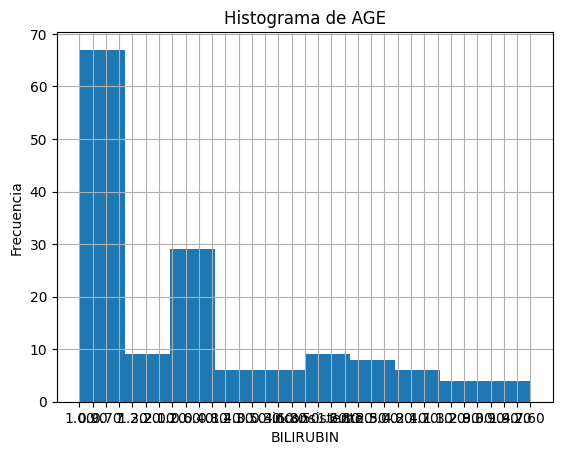

In [42]:
df_hepatitis['BILIRUBIN'].hist(bins=10)
plt.xlabel('BILIRUBIN')
plt.ylabel('Frecuencia')
plt.title('Histograma de AGE')
plt.show()

In [43]:
df_hepatitis['BILIRUBIN'] = pd.to_numeric(df_hepatitis['BILIRUBIN'], errors='coerce')
df_hepatitis['BILIRUBIN'] = df_hepatitis['BILIRUBIN'].apply(lambda x: x if x < 4 else np.nan)

mean_BILIRUBIN = df_hepatitis['BILIRUBIN'].mean()
df_hepatitis['BILIRUBIN'] = df_hepatitis['BILIRUBIN'].fillna(mean_BILIRUBIN)

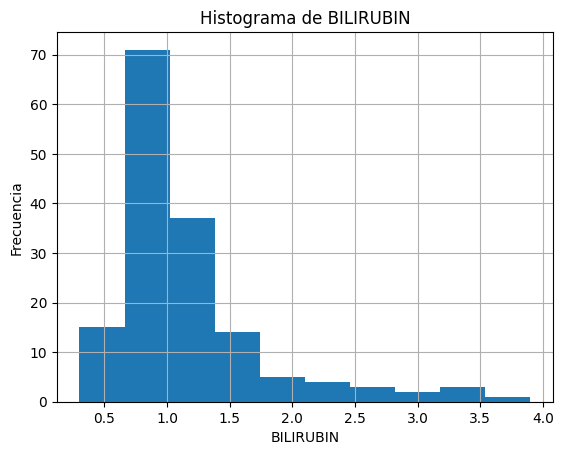

In [44]:
df_hepatitis['BILIRUBIN'].hist(bins=10)
plt.xlabel('BILIRUBIN')
plt.ylabel('Frecuencia')
plt.title('Histograma de BILIRUBIN')
plt.show()

In [45]:
df_hepatitis['BILIRUBIN'] = scaler.fit_transform(df_hepatitis[['BILIRUBIN']])

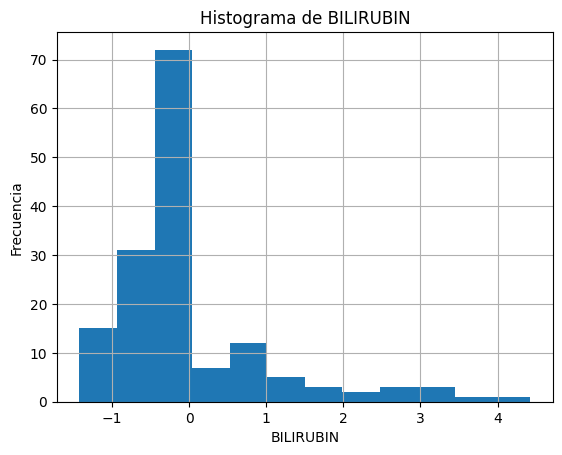

In [46]:
df_hepatitis['BILIRUBIN'].hist(bins=12)
plt.xlabel('BILIRUBIN')
plt.ylabel('Frecuencia')
plt.title('Histograma de BILIRUBIN')
plt.show()

## ALK PHOSPHATE

In [47]:
df_hepatitis['ALK PHOSPHATE'].value_counts()

ALK PHOSPHATE
?      28
85     17
62      4
81      4
75      3
       ..
164     1
103     1
96      1
68      1
89      1
Name: count, Length: 82, dtype: int64

In [48]:
df_hepatitis['ALK PHOSPHATE']

0       85
1      NaN
2       96
3       46
4        ?
      ... 
150      ?
151    NaN
152     75
153     81
154    100
Name: ALK PHOSPHATE, Length: 155, dtype: object

In [49]:
df_hepatitis['ALK PHOSPHATE'] = pd.to_numeric(df_hepatitis['ALK PHOSPHATE'], errors='coerce')

mean_ALK_PHOSPHATE = df_hepatitis['ALK PHOSPHATE'].mean()
df_hepatitis['ALK PHOSPHATE'] = df_hepatitis['ALK PHOSPHATE'].fillna(mean_ALK_PHOSPHATE)

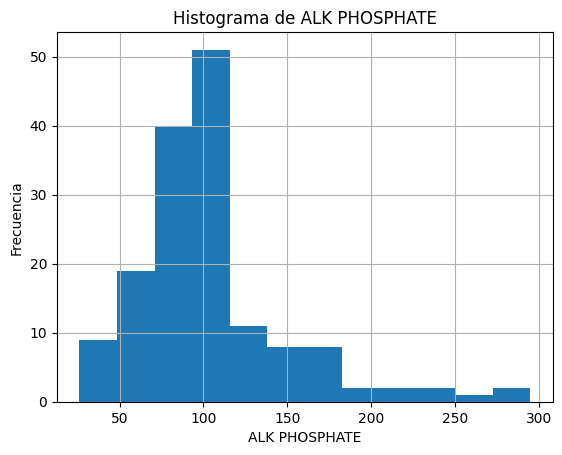

In [50]:
df_hepatitis['ALK PHOSPHATE'].hist(bins=12)
plt.xlabel('ALK PHOSPHATE')
plt.ylabel('Frecuencia')
plt.title('Histograma de ALK PHOSPHATE')
plt.show()

In [51]:
df_hepatitis['ALK PHOSPHATE'] = scaler.fit_transform(df_hepatitis[['ALK PHOSPHATE']])

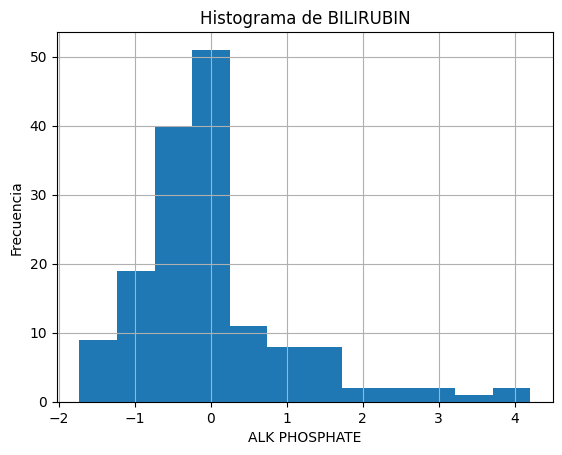

In [52]:
df_hepatitis['ALK PHOSPHATE'].hist(bins=12)
plt.xlabel('ALK PHOSPHATE')
plt.ylabel('Frecuencia')
plt.title('Histograma de BILIRUBIN')
plt.show()

## SGOT

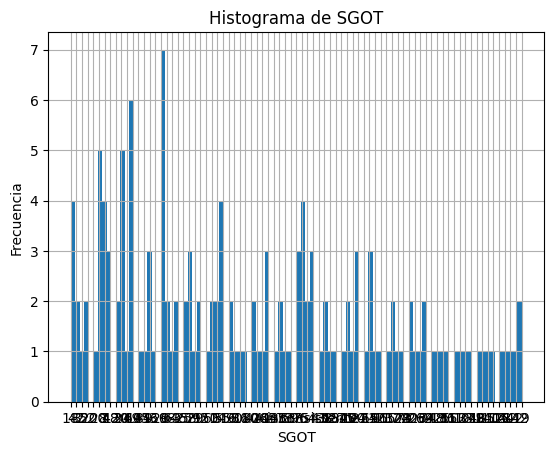

In [53]:
df_hepatitis['SGOT'].value_counts()
df_hepatitis['SGOT'].hist(bins=100)
plt.xlabel('SGOT')
plt.ylabel('Frecuencia')
plt.title('Histograma de SGOT')
plt.show()

In [54]:
df_hepatitis['SGOT'] = pd.to_numeric(df_hepatitis['SGOT'], errors='coerce')

mean_SGOT = df_hepatitis['SGOT'].mean()
df_hepatitis['SGOT'] = df_hepatitis['SGOT'].fillna(mean_SGOT)

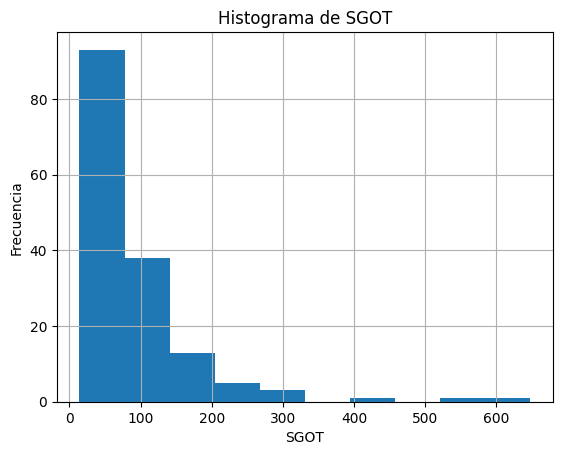

In [55]:
df_hepatitis['SGOT'].value_counts()
df_hepatitis['SGOT'].hist(bins=10)
plt.xlabel('SGOT')
plt.ylabel('Frecuencia')
plt.title('Histograma de SGOT')
plt.show()

In [56]:
df_hepatitis['SGOT'] = scaler.fit_transform(df_hepatitis[['SGOT']])

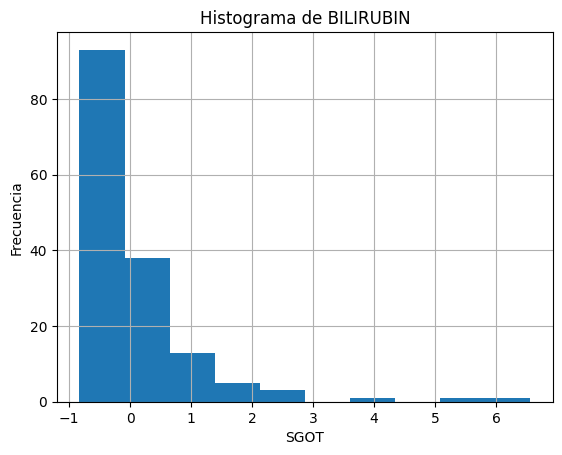

In [57]:
df_hepatitis['SGOT'].value_counts()
df_hepatitis['SGOT'].hist(bins=10)
plt.xlabel('SGOT')
plt.ylabel('Frecuencia')
plt.title('Histograma de BILIRUBIN')
plt.show()

## ALBUMIN

In [58]:
df_hepatitis['ALBUMIN'].value_counts()


ALBUMIN
4.0              23
?                14
4.2              12
4.4               9
3.9               8
4.1               8
3.8               8
3.3               6
4.3               6
2.9               5
3.5               5
3.0               4
3.4               4
4.5               4
2.6               3
3.1               3
2.7               3
inconsistente     3
2.8               3
4.6               2
3.6               2
4.9               2
3.7               2
2.2               1
6.4               1
2.1               1
5.0               1
4.8               1
5.3               1
4.7               1
2.4               1
Name: count, dtype: int64

In [59]:
df_hepatitis['ALBUMIN'] = pd.to_numeric(df_hepatitis['ALBUMIN'], errors='coerce')

mean_ALBUMIN = df_hepatitis['ALBUMIN'].mean()
df_hepatitis['ALBUMIN'] = df_hepatitis['ALBUMIN'].fillna(mean_ALBUMIN)

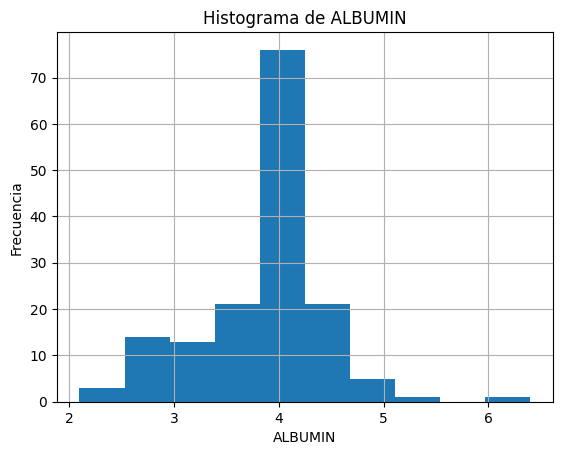

In [60]:
df_hepatitis['ALBUMIN'].value_counts()
df_hepatitis['ALBUMIN'].hist(bins=10)
plt.xlabel('ALBUMIN')
plt.ylabel('Frecuencia')
plt.title('Histograma de ALBUMIN')
plt.show()

In [61]:
df_hepatitis['ALBUMIN'] = scaler.fit_transform(df_hepatitis[['ALBUMIN']])

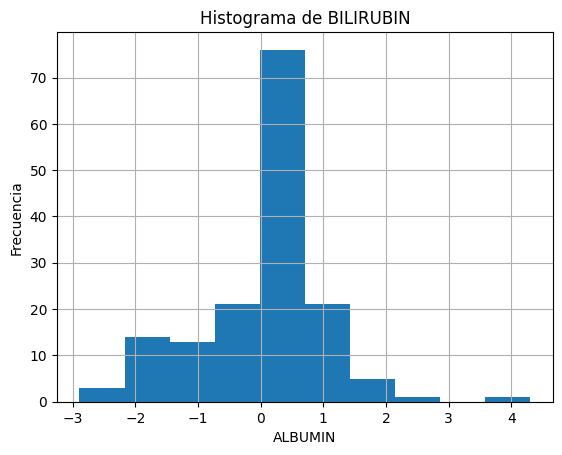

In [62]:
df_hepatitis['ALBUMIN'].value_counts()
df_hepatitis['ALBUMIN'].hist(bins=10)
plt.xlabel('ALBUMIN')
plt.ylabel('Frecuencia')
plt.title('Histograma de BILIRUBIN')
plt.show()

## PROTIME

In [63]:
df_hepatitis['PROTIME'].value_counts()

PROTIME
?                61
100              10
85                4
46                4
74                4
52                3
31                3
inconsistente     3
57                3
66                3
41                3
90                3
67                2
60                2
54                2
50                2
73                2
56                2
29                2
70                2
62                2
63                2
40                1
78                1
48                1
35                1
43                1
75                1
0                 1
30                1
32                1
72                1
23                1
51                1
38                1
36                1
84                1
58                1
76                1
64                1
39                1
47                1
80                1
77                1
21                1
42                1
Name: count, dtype: int64

In [64]:
df_hepatitis['PROTIME'] = pd.to_numeric(df_hepatitis['PROTIME'], errors='coerce')

mean_PROTIME = df_hepatitis['PROTIME'].mean()
df_hepatitis['PROTIME'] = df_hepatitis['PROTIME'].fillna(mean_PROTIME)

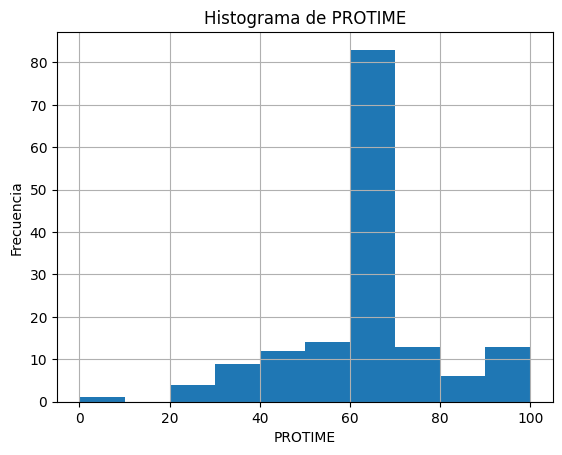

In [65]:
df_hepatitis['PROTIME'].value_counts()
df_hepatitis['PROTIME'].hist(bins=10)
plt.xlabel('PROTIME')
plt.ylabel('Frecuencia')
plt.title('Histograma de PROTIME')
plt.show()

In [66]:
df_hepatitis['PROTIME'] = scaler.fit_transform(df_hepatitis[['PROTIME']])

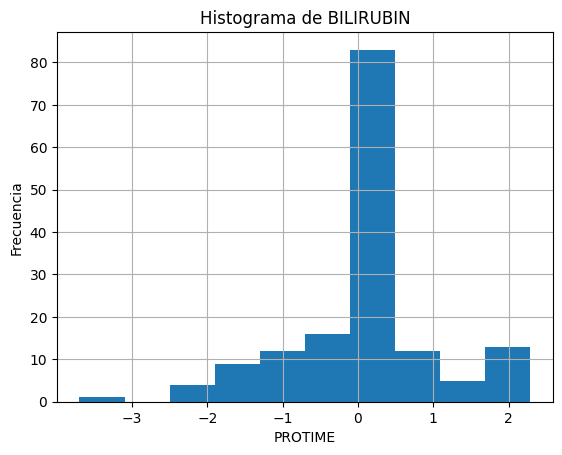

In [67]:
df_hepatitis['PROTIME'].value_counts()
df_hepatitis['PROTIME'].hist(bins=10)
plt.xlabel('PROTIME')
plt.ylabel('Frecuencia')
plt.title('Histograma de BILIRUBIN')
plt.show()

## HISTOLOGY

In [68]:
df_hepatitis['HISTOLOGY'].value_counts()

HISTOLOGY
1.000000    75
2.000000    67
9.649002     4
1.200000     1
Name: count, dtype: int64

In [69]:
df_hepatitis['HISTOLOGY'] = pd.to_numeric(df_hepatitis['HISTOLOGY'], errors='coerce')

# Paso 3: Mantener solo valores 0, 1 y 2
df_hepatitis['HISTOLOGY'] = df_hepatitis['HISTOLOGY'].apply(lambda x: x if x in [0, 1, 2] else np.nan)

# Paso 4: Reemplazar 1 por 0 y 2 por 1
df_hepatitis['HISTOLOGY'] = df_hepatitis['HISTOLOGY'].replace({1: 0, 2: 1})

# Paso 5: Calcular la moda de la columna y rellenar los NaN con ella
moda_HISTOLOGY = df_hepatitis['HISTOLOGY'].mode()
moda_HISTOLOGY = moda_HISTOLOGY[0] if not moda_HISTOLOGY.empty else 0
df_hepatitis['HISTOLOGY'] = df_hepatitis['HISTOLOGY'].fillna(moda_HISTOLOGY)

# Paso 6: Convertir a tipo int
df_hepatitis['HISTOLOGY'] = df_hepatitis['HISTOLOGY'].astype(int)

# Verificar la distribución de valores
print(df_hepatitis['HISTOLOGY'].value_counts())

HISTOLOGY
0    88
1    67
Name: count, dtype: int64


In [70]:
print(df_hepatitis.isna().sum())  

Class              0
AGE                0
SEX                0
STEROID            0
ANTIVIRALS         0
FATIGUE            0
MALAISE            0
ANOREXIA           0
LIVER BIG          0
LIVER FIRM         0
SPLEEN PALPABLE    0
SPIDERS            0
ASCITES            0
VARICES            0
BILIRUBIN          0
ALK PHOSPHATE      0
SGOT               0
ALBUMIN            0
PROTIME            0
HISTOLOGY          0
dtype: int64


# Modelado

### PCA

In [71]:
df_hepatitis_PC = df_hepatitis.drop(columns = ['Class'])
df_hepatitis_Supervivientes = df_hepatitis['Class']


In [72]:
print(df_hepatitis_PC.shape)

(155, 19)


In [73]:
pca = PCA(n_components=19)
PCA_hepatitis = pca.fit_transform(df_hepatitis_PC)

#Componentes Principales de PC1 a PC19
PC = [f'PC{i}' for i in range(1, 20)]

df_pca_hepatitis = pd.DataFrame(data = PCA_hepatitis, columns = PC)



In [74]:
def biplot(etiquetas, columnas, df_pca, pca, componente_x, componente_y, title = 'Biplot', incluir_nombres = False):
    plt.figure(figsize = (14, 8))
    pcx_txt = f'PC{componente_x}'
    pcy_txt = f'PC{componente_y}'

    survived_colors = ['red' if val == 0 else 'green' for val in etiquetas]  # 0 en rojo, 1 en verde
    plt.scatter(df_pca[pcx_txt], df_pca[pcy_txt], alpha = 0.5, c=survived_colors)
    
    plt.title(title)
    plt.xlabel(f'{pcx_txt} {round(pca.explained_variance_ratio_[componente_x-1] * 100, 2)}%')
    plt.ylabel(f'{pcy_txt} {round(pca.explained_variance_ratio_[componente_y-1] * 100, 2)}%')
    for i, (pc1, pc2) in enumerate(zip(pca.components_[componente_x-1], pca.components_[componente_y-1])):
    # Aumentar tamaño de flechas
        pc1 *= 6
        pc2 *= 6
        plt.arrow(0, 0, pc1, pc2, head_width = 0.1, head_length = 0.1, linewidth = 2, color = 'black')
        plt.text(pc1, pc2, columnas[i], color = 'black', ha = 'right', va = 'bottom')  # Cambiado i+1 por i

    # Mostrar el nombre en cada punto
    if incluir_nombres:
        for i, nombre in enumerate(etiquetas):
            plt.text(df_pca[pcx_txt][i], df_pca[pcy_txt][i], nombre, color = 'blue', ha = 'left', va = 'bottom')
    plt.grid()
    plt.show()

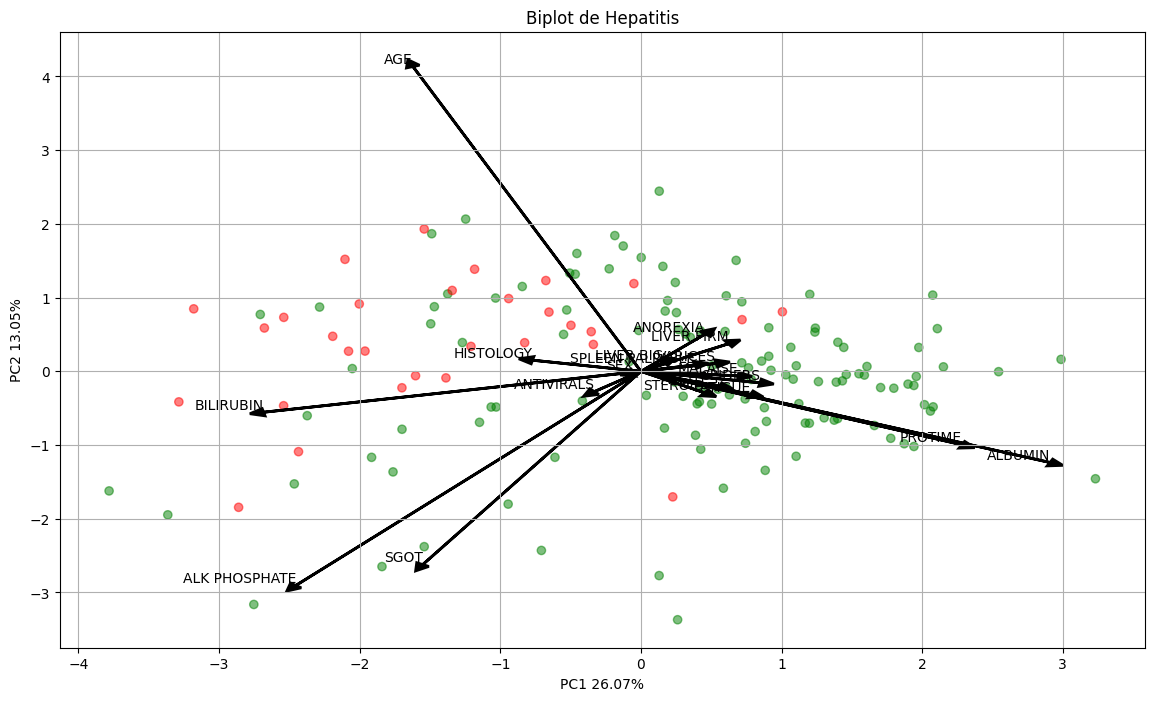

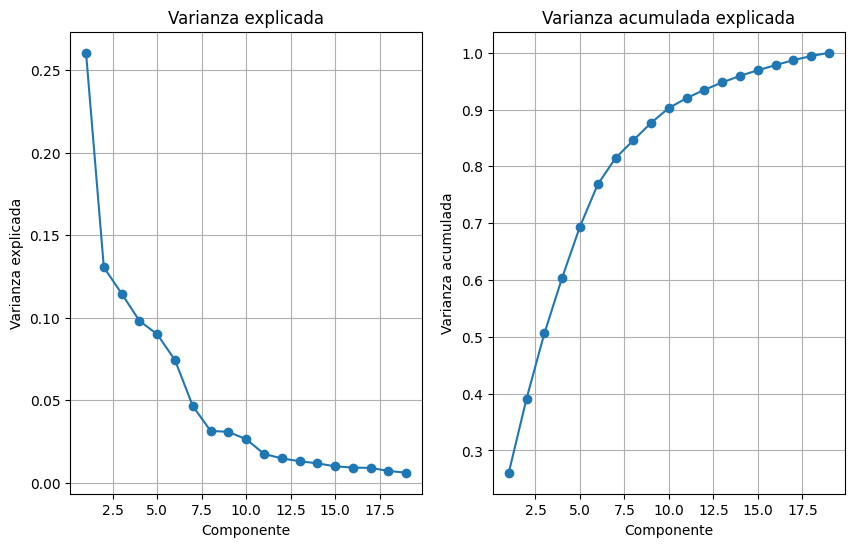

In [75]:
#%% Graficar biplot
biplot(df_hepatitis_Supervivientes, df_hepatitis_PC.columns, df_pca_hepatitis, pca, componente_x = 1, componente_y = 2, title = 'Biplot de Hepatitis', incluir_nombres = False)

# %% Graficar la varianza explicada y acumulada en un único gráfico formado por dos subgráficos
plt.figure(figsize = (10, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker = 'o')
plt.title('Varianza explicada')
plt.xlabel('Componente')
plt.ylabel('Varianza explicada')
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker = 'o')
plt.title('Varianza acumulada explicada')
plt.xlabel('Componente')
plt.ylabel('Varianza acumulada')
plt.grid()
plt.show()

### Clasificación (LOGIT REGRESSION)

#### Shrinking ELASTIC NET

In [76]:
X = df_hepatitis.drop(columns = ['Class'])
y = df_hepatitis['Class']

In [77]:
#Los datos ya estan escalados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

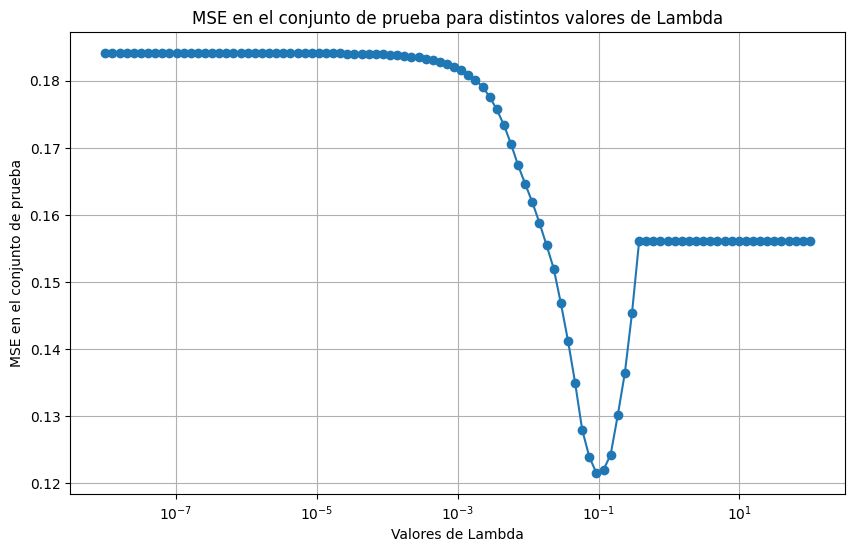

In [78]:
alphas = np.logspace(-8, 2, 100)  # 100 valores de 10e-8 a 10e2

# Lista para guardar el error en el conjunto de prueba
test_errors = []

# Iteramos sobre cada valor de lambda
for alpha in alphas:
    # Ajustamos un modelo de ElasticNet para cada valor de alpha
    elastic_net = ElasticNet(alpha=alpha, l1_ratio=0.5, random_state=42)  # l1_ratio esta en medio
    elastic_net.fit(X_train, y_train)
    
    # Predecimos
    y_pred = elastic_net.predict(X_test)
    
    # Calculamos el MSE en el conjunto de prueba
    mse = mean_squared_error(y_test, y_pred)
    test_errors.append(mse)

# Graficamos el MSE en el conjunto de prueba contra los valores de alpha (lambdas)
plt.figure(figsize=(10, 6))
plt.plot(alphas, test_errors, marker='o')
plt.xscale('log')
plt.xlabel('Valores de Lambda')
plt.ylabel('MSE en el conjunto de prueba')
plt.title('MSE en el conjunto de prueba para distintos valores de Lambda')
plt.grid(True)
plt.show()

In [79]:
# Encontramos el lambda MSE mínimo
best_index = np.argmin(test_errors)

# Obtenemos el mejor valor de lambda (alpha) y el menor MSE
best_alpha = alphas[best_index]
best_mse = test_errors[best_index]

print(f"El mejor valor de lambda es: {best_alpha:.4e} con un MSE de: {best_mse:.4f}")

El mejor valor de lambda es: 9.3260e-02 con un MSE de: 0.1215


In [80]:
model = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5, C=1/best_alpha, random_state=42, max_iter=1000)
model.fit(X_train, y_train)

# Predecimos con el mejor lambda
y_pred = model.predict(X_test)

# Calcular la precision
accuracy = accuracy_score(y_test, y_pred)
print(f" TEST Precision: {accuracy:.4f}")

# Matriz de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:")
print(conf_matrix)

# Classificattion Report
class_report = classification_report(y_test, y_pred)
print("Reporte de clasificación:")
print(class_report)

 TEST Precision: 0.7097
Matriz de confusión:
[[ 2  4]
 [ 5 20]]
Reporte de clasificación:
              precision    recall  f1-score   support

         0.0       0.29      0.33      0.31         6
         1.0       0.83      0.80      0.82        25

    accuracy                           0.71        31
   macro avg       0.56      0.57      0.56        31
weighted avg       0.73      0.71      0.72        31



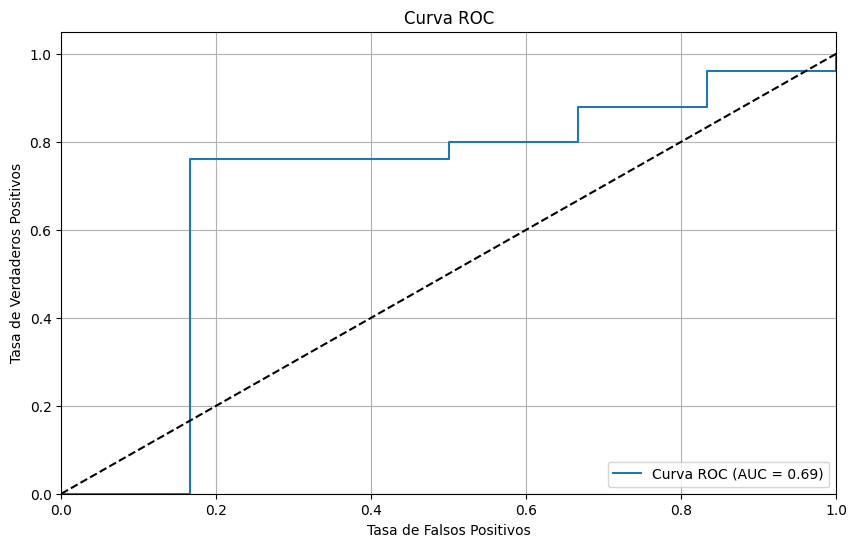

In [81]:
y_prob = model.predict_proba(X_test)[:, 1]  # Probabilidades de la clase positiva

# Calculando Verdader Positivo (TPR) y Falso Positivo (FPR)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculando el AUC
auc = roc_auc_score(y_test, y_prob)

# Graficando la curva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label='Curva ROC (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')  # Línea diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [82]:
#Area bajo la curva
print(roc_auc_score(y_test, y_prob))

0.6933333333333334


### Clasificacion (Arboles de Decision)

### Support Vector Machine (SVM)